In [1]:
import pandas as pd
import numpy as np
import re

data = pd.read_csv("alldata.csv")

In [2]:
data

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"
...,...,...,...,...,...
6959,Data Developer / Machine Learning Analyst,NetApp,Are you data-driven? We at NetApp believe in t...,574.0,"Sunnyvale, CA"
6960,Scientist I,"Pharmacyclics, an Abbvie Company",Pharmacyclics is committed to the development ...,26.0,"Sunnyvale, CA"
6961,Intern Scientist,Oath Inc,"Oath, a subsidiary of Verizon, is a values-led...",5.0,"Sunnyvale, CA"
6962,Senior Data & Applied Scientist,Microsoft,We are the Bing Core Relevance team responsibl...,4618.0,"Sunnyvale, CA"


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6953 entries, 0 to 6963
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   position        6953 non-null   object 
 1   company         6953 non-null   object 
 2   description     6953 non-null   object 
 3   reviews         5326 non-null   float64
 4   location        6953 non-null   object 
 5   location_clean  6953 non-null   object 
 6   state           6953 non-null   object 
 7   ds yes          6953 non-null   int64  
 8   python          6953 non-null   bool   
 9   statistics      6953 non-null   bool   
 10  java            6953 non-null   bool   
 11  sql             6953 non-null   bool   
 12  excel           6953 non-null   bool   
 13  modeling        6953 non-null   bool   
 14  c++             6953 non-null   bool   
 15  r               6953 non-null   bool   
 16  has_phd         6953 non-null   bool   
 17  has_bachelor    6953 non-null   b

In [4]:
data = data.dropna(how = 'all')

## 1. Location

In [5]:
data['location'].unique

<bound method Series.unique of 0        Atlanta, GA 30301 
1               Atlanta, GA
2               Atlanta, GA
3        Atlanta, GA 30303 
4               Atlanta, GA
               ...         
6959          Sunnyvale, CA
6960          Sunnyvale, CA
6961          Sunnyvale, CA
6962          Sunnyvale, CA
6963    Sunnyvale, CA 94089
Name: location, Length: 6953, dtype: object>

In [6]:
data['location'].str.extract(r'([\D]+ ?[\D]+, \D\D)')

,0
0,"Atlanta, GA"
1,"Atlanta, GA"
2,"Atlanta, GA"
3,"Atlanta, GA"
4,"Atlanta, GA"
...,...
6959,"Sunnyvale, CA"
6960,"Sunnyvale, CA"
6961,"Sunnyvale, CA"
6962,"Sunnyvale, CA"


In [7]:
data['location_clean'] = data['location'].str.extract(r'([\D]+ ?[\D]+, \D\D)')

<ipython-input-7-833737a1dd0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['location_clean'] = data['location'].str.extract(r'([\D]+ ?[\D]+, \D\D)')


In [8]:
data.head()

,position,company,description,reviews,location,location_clean
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301","Atlanta, GA"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA","Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA","Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303","Atlanta, GA"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA","Atlanta, GA"


In [9]:
data['state'] = data['location_clean'].str[-2:]

<ipython-input-9-cc1d1e136840>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['state'] = data['location_clean'].str[-2:]


## 2. Position

In [10]:
#re.IGNORECASE

data['position'].str.findall('data scientist', flags = re.IGNORECASE)

0                     []
1                     []
2       [Data Scientist]
3                     []
4                     []
              ...       
6959                  []
6960                  []
6961                  []
6962                  []
6963    [Data Scientist]
Name: position, Length: 6953, dtype: object

In [11]:
data['ds yes'] = data['position'].str.count('data scientist', flags = re.IGNORECASE)

<ipython-input-11-2110d14d48d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ds yes'] = data['position'].str.count('data scientist', flags = re.IGNORECASE)


In [12]:
data.head()

,position,company,description,reviews,location,location_clean,state,ds yes
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301","Atlanta, GA",GA,0
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA","Atlanta, GA",GA,0
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA","Atlanta, GA",GA,1
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303","Atlanta, GA",GA,0
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA","Atlanta, GA",GA,0


In [13]:
data['ds yes'].value_counts()

0    5692
1    1252
2       9
Name: ds yes, dtype: int64

## 3. Description

We will be looking for these skills:
- python
- statistics
- modeling
- programming
- SQL
- excel
- java

We will be looking for these characteristics:
- Bachelor's Degree
- Master's Degree
- PhD
- Experience in years

In [14]:
data['description'].head(20)

0     Development Director\nALS Therapy Development ...
1     Job Description\n\n"The road that leads to acc...
2     Growing company located in the Atlanta, GA are...
3     DEPARTMENT: Program OperationsPOSITION LOCATIO...
4     DESCRIPTION\nThe Emory University Department o...
5     Qualifications\nBachelor’s degree in Computer ...
6     Qualifications\nBachelor’s degree\n5-7 years o...
7     Overview / Responsibilities\nWood Environment ...
8     Works closely with senior CIB professionals. P...
9     Known for being a great place to work and buil...
10    :\n\nThe Statistical Forecast Analyst position...
11    Chenega Professional &amp; Technical Services,...
12    Innovate. Collaborate. Shine. Lighthouse — KPM...
13    DESCRIPTION\nUnder minimal supervision, the As...
14    Data Science Analyst– Business Intelligence\nL...
15    Cotiviti is looking for an industry leading Da...
16    Description\nExecutes complex assignments requ...
17    Overview\n\n\n\nAt Perficient you’ll deliv

### Use regex to extract different skills like python from description

For each column I have used .extract first to check the value groups e.g. Python, python, PYTHON.
After that I used .contains to create a column that returns True or False

In [15]:
data['python'] = data['description'].str.extract(r'(\bpython\b)', flags = re.IGNORECASE)

<ipython-input-15-7ef36db3e4eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['python'] = data['description'].str.extract(r'(\bpython\b)', flags = re.IGNORECASE)


In [16]:
data['python'].value_counts()

Python    2707
python     114
PYTHON       2
Name: python, dtype: int64

In [17]:
data['python'] = data['description'].str.contains(r'(\bpython\b)', flags = re.IGNORECASE)

/Users/andrenovikov/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
<ipython-input-17-98848658d9e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['python'] = data['description'].str.contains(r'(\bpython\b)', flags = re.IGNORECASE)


In [18]:
data['statistics'] = data['description'].str.extract(r'(\bstatistics\b)', flags = re.IGNORECASE)

<ipython-input-18-c7dff2e96dbf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['statistics'] = data['description'].str.extract(r'(\bstatistics\b)', flags = re.IGNORECASE)


In [19]:
data['statistics'].value_counts()

statistics    1143
Statistics     869
Name: statistics, dtype: int64

In [20]:
data['statistics'] = data['description'].str.contains(r'(\bstatistics\b)', flags = re.IGNORECASE)

<ipython-input-20-2a52fdb9b5d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['statistics'] = data['description'].str.contains(r'(\bstatistics\b)', flags = re.IGNORECASE)


In [21]:
data['java'] = data['description'].str.extract(r'(\bjava\b)', flags = re.IGNORECASE)

<ipython-input-21-49469bdc9471>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['java'] = data['description'].str.extract(r'(\bjava\b)', flags = re.IGNORECASE)


In [22]:
data['java'].value_counts()

Java    1209
JAVA      17
java       9
Name: java, dtype: int64

In [23]:
data['java'] = data['description'].str.contains(r'(\bjava\b)', flags = re.IGNORECASE)

<ipython-input-23-5079389c7068>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['java'] = data['description'].str.contains(r'(\bjava\b)', flags = re.IGNORECASE)


In [24]:
data['sql'] = data['description'].str.extract(r'(\bSQL\b)', flags = re.IGNORECASE)

<ipython-input-24-97026b833ca0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sql'] = data['description'].str.extract(r'(\bSQL\b)', flags = re.IGNORECASE)


In [25]:
data['sql'].value_counts()

SQL    1676
sql       9
Sql       5
SQl       1
Name: sql, dtype: int64

In [26]:
data['sql'] = data['description'].str.contains(r'(\bsql\b)', flags = re.IGNORECASE)

<ipython-input-26-a4288ec3f28a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sql'] = data['description'].str.contains(r'(\bsql\b)', flags = re.IGNORECASE)


In [27]:
data['excel'] = data['description'].str.extract(r'(\bexcel\b)', flags = re.IGNORECASE)

<ipython-input-27-05753fb66a6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['excel'] = data['description'].str.extract(r'(\bexcel\b)', flags = re.IGNORECASE)


In [28]:
data['excel'].value_counts()

Excel    862
excel    122
EXCEL      7
Name: excel, dtype: int64

In [29]:
data['excel'] = data['description'].str.contains(r'(\bexcel\b)', flags = re.IGNORECASE)

<ipython-input-29-bd5e10943b89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['excel'] = data['description'].str.contains(r'(\bexcel\b)', flags = re.IGNORECASE)


In [30]:
data['modeling'] = data['description'].str.extract(r'(\bmodeling\b)', flags = re.IGNORECASE)

<ipython-input-30-8ddb46adff54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['modeling'] = data['description'].str.extract(r'(\bmodeling\b)', flags = re.IGNORECASE)


In [31]:
data['modeling'] = data['description'].str.contains(r'(\bmodeling\b)', flags = re.IGNORECASE)

<ipython-input-31-6a43c86448a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['modeling'] = data['description'].str.contains(r'(\bmodeling\b)', flags = re.IGNORECASE)


In [32]:
data['statistics'] = data['description'].str.extract(r'(\bstatistics\b)', flags = re.IGNORECASE)

<ipython-input-32-c7dff2e96dbf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['statistics'] = data['description'].str.extract(r'(\bstatistics\b)', flags = re.IGNORECASE)


In [33]:
data['statistics'] = data['description'].str.contains(r'(\bstatistics\b)', flags = re.IGNORECASE)

<ipython-input-33-2a52fdb9b5d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['statistics'] = data['description'].str.contains(r'(\bstatistics\b)', flags = re.IGNORECASE)


In [34]:
data.head()

,position,company,description,reviews,location,location_clean,state,ds yes,python,statistics,java,sql,excel,modeling
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301","Atlanta, GA",GA,0,False,False,False,False,False,False
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA","Atlanta, GA",GA,0,False,True,False,False,False,True
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA","Atlanta, GA",GA,1,True,False,True,True,False,True
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303","Atlanta, GA",GA,0,True,False,False,True,False,True
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA","Atlanta, GA",GA,0,False,False,False,False,False,False


In [35]:
data['c++'] = data['description'].str.extract(r'([.C]\+\+)', flags = re.IGNORECASE)
data['c++'].value_counts()

<ipython-input-35-bb24d460edbe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['c++'] = data['description'].str.extract(r'([.C]\+\+)', flags = re.IGNORECASE)


C++    966
c++      1
Name: c++, dtype: int64

In [36]:
data['c++'] = data['description'].str.contains(r'([.C]\+\+)', flags = re.IGNORECASE)

/Users/andrenovikov/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
<ipython-input-36-6679b32542fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['c++'] = data['description'].str.contains(r'([.C]\+\+)', flags = re.IGNORECASE)


In [37]:
data['r'] = data['description'].str.extract(r'(\s[R]\s)', flags = re.IGNORECASE)
data['r'].value_counts()

<ipython-input-37-d5956eaf2e0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['r'] = data['description'].str.extract(r'(\s[R]\s)', flags = re.IGNORECASE)


 R      515
 R\n     93
\nR       6
 r        3
Name: r, dtype: int64

In [38]:
data['r'] = data['description'].str.contains(r'(\s[.R]\s)', flags = re.IGNORECASE)

<ipython-input-38-20734be66868>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['r'] = data['description'].str.contains(r'(\s[.R]\s)', flags = re.IGNORECASE)


### Get the different degrees (graduation titles) from the description

Could have done this with regex probably, but decided to try a different mechanism:
1. Replaced null values in the description column, so there are no more floats
2. Created a function that loops through the column and checks for degree titles saved in some lists
3. Apply this as a lamda function to create a new column that says true or false if the description includes a degree

In [41]:
data['description'] = data['description'].fillna('No description')

<ipython-input-41-a8c0ed18c220>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['description'] = data['description'].fillna('No description')


In [42]:
data.shape

(6953, 16)

In [43]:
#Create a function that takes a column and a list as input and returns true or false if it finds the value or not

phd_degrees = ["phd", "ph.d.", "dr"]
bachelor_degrees = ["bachelor", "bachelors's", "BA", "B.Sc", "BSc"]
master_degrees = ["master", "masters's", "MA", "M.Sc", "MSc"]

def mapper(x, degree_list):
    x = x.lower()
    for degree in degree_list:
        return degree in x
            

In [44]:
#Use a lambda function to apply the function to the column per list
#Just using the function with .apply would not work, since it would only accept one input, but the function has 2

data['has_phd'] = data['description'].apply(lambda x: mapper(x, phd_degrees))

<ipython-input-44-a13c5f05747d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['has_phd'] = data['description'].apply(lambda x: mapper(x, phd_degrees))


In [45]:
data['has_phd'].value_counts()

False    5229
True     1724
Name: has_phd, dtype: int64

In [46]:
data['has_bachelor'] = data['description'].apply(lambda x: mapper(x, bachelor_degrees))

<ipython-input-46-d5861a20518b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['has_bachelor'] = data['description'].apply(lambda x: mapper(x, bachelor_degrees))


In [47]:
data['has_bachelor'].value_counts()

False    4833
True     2120
Name: has_bachelor, dtype: int64

In [48]:
data['has_master'] = data['description'].apply(lambda x: mapper(x, master_degrees))

<ipython-input-48-05af9e68f322>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['has_master'] = data['description'].apply(lambda x: mapper(x, master_degrees))


In [49]:
data['has_master'].value_counts()

False    4904
True     2049
Name: has_master, dtype: int64

### Visualisation

So far just playing around

In [50]:
phd_true = data[data['has_phd'] == True]

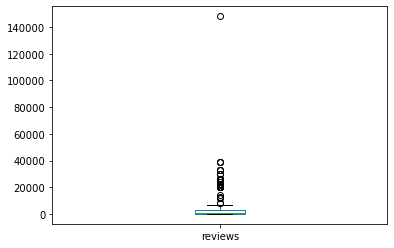

In [51]:
phd_true['reviews'].plot(kind = 'box');

In [52]:
import seaborn as sns

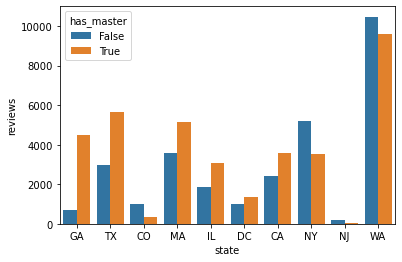

In [53]:
sns.barplot(data = phd_true, x = 'state', y = 'reviews', hue = 'has_master', ci = False);